In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Bag Of Words [NLP METHOD]

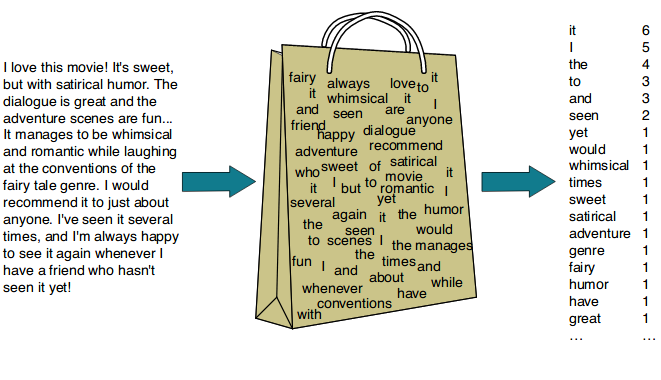

I feel this is the simplest method in NLP. It includes a basic concept that is creating the text into a vector form which includes the frequency of each word in the sentence - hence creating a vector which will be an independent feature for our model and the classification of text(1 or 0 as in this dataset) will be the dependent feature. Model can be trained using any algorithm (Decision Tree Classifier, Naive Bais). However this method is less efficient as it ignores the semantic part of the text. 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('../input/nlp-getting-started/train.csv')

In [ ]:
df.head(5)

In [ ]:
df.info()

In [ ]:
sns.heatmap(df.isnull())

The columns - keyword and location will be dropped as they are of no use to us.

In [ ]:
df.drop(['location','keyword'],axis=1,inplace=True)

In [ ]:
df

In [ ]:
real = df[df['target']==1]

In [ ]:
real

In [ ]:
unreal = df[df['target']==0]

In [ ]:
unreal

In [ ]:
print('real disaster message percentage:',(len(real)/len(df))*100)

In [ ]:
print('fake disaster message percentage:',(len(unreal)/len(df))*100)

Data Visualisation

In [ ]:
sns.countplot(df['target'])

We have quite balanced data!

In [ ]:
import string


In [ ]:
string.punctuation

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stopwords.words('english');

In [ ]:
def message_cleaning(message):
    test_punc_removed = [char   for char in message if char not in string.punctuation]
    test_punc_removed_joined = ''.join(test_punc_removed)
    test_punc_removed_joined_clean = [word   for word in test_punc_removed_joined.split(' ') if word not in stopwords.words('english')]
    return test_punc_removed_joined_clean

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(analyzer=message_cleaning)

We are going to vectorize the text along with increasing the readablity of the text by removing the punctuations and countwords!

In [ ]:
disaster_tweet_vectorizer = vectorizer.fit_transform(df['text'])

In [ ]:
print(vectorizer.get_feature_names());

In [ ]:
print(disaster_tweet_vectorizer.toarray())

This matrix shows the count of unique words (as shown in previous cell output) in each sentance.

In [ ]:
disaster_tweet_vectorizer.shape

So there are 7613 disaster tweets and 21637 unique words.

In [ ]:
label = df['target']

In [ ]:
label.shape

**Training the Model**

In [ ]:
X = disaster_tweet_vectorizer

In [ ]:
X = X.toarray()

In [ ]:
X

In [ ]:
y = label

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


In [ ]:
LR = LogisticRegression()
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
NB = GaussianNB()

In [ ]:
RFC.fit(X_train,y_train)
DTC.fit(X_train,y_train)
NB.fit(X_train,y_train)
LR.fit(X_train,y_train)

Making Prediction

In [ ]:
predict1 = RFC.predict(X_test)
predict2 = DTC.predict(X_test)
predict3 = NB.predict(X_test)
predict4 = LR.predict(X_test)

**Checking the Performance**

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
print(classification_report(y_test,prediction))

In [ ]:
print(accuracy_score(y_test,predict1))
print('\n')
print(accuracy_score(y_test,predict2))
print('\n')
print(accuracy_score(y_test,predict3))
print('\n')
print(accuracy_score(y_test,predict4))

Highest Accuracy Using Logisitic Regression.

The accuracy is quite good!

Lets predict for testing dataset

In [ ]:
test_df = pd.read_csv('../input/nlp-getting-started/test.csv')

In [ ]:
test_df.head()

In [ ]:
test_df.drop(['keyword','location'],axis=1,inplace= True)

In [ ]:
test_df.head()

In [ ]:
test_vectorizer = vectorizer.transform(test_df['text'])

In [ ]:
test_vectorizer.shape

Lets Predict!

In [ ]:
final_predictions = LR.predict(test_vectorizer)

In [ ]:
final_predictions

In [ ]:
submission_df = pd.DataFrame()

In [ ]:
submission_df['id'] = test_df['id']
submission_df['target'] = final_predictions

In [ ]:
submission_df['target'].value_counts()